<a href="https://colab.research.google.com/github/skhazaei/TensorFlow-repo/blob/master/diabetes_dataset_Batch_normalisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()

In [2]:
data = diabetes_dataset['data']
target = diabetes_dataset['target']

In [3]:
target = (target - target.mean(axis=0)) /target.std()

In [4]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.1)

# **Batch normalisation:** Layer that normalizes its inputs.

Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.

 

```
tf.keras.layers.BatchNormalization(
    axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True,
    beta_initializer='zeros', gamma_initializer='ones',
    moving_mean_initializer='zeros',
    moving_variance_initializer='ones', beta_regularizer=None,
    gamma_regularizer=None, beta_constraint=None, gamma_constraint=None,
    renorm=False, renorm_clipping=None, renorm_momentum=0.99, fused=None,
    trainable=True, virtual_batch_size=None, adjustment=None, name=None, **kwargs
)
```
* **The hyperparameter momentum**: is the weighting given to the previous running mean when re-computing it with an extra minibatch. By default, it is set to 0.99.

* **The hyperparameter $\epsilon$**: is used for numeric stability when performing the normalisation over the minibatch. By default it is set to 0.001.

* **The parameters $\beta$ and $\gamma$**: are used to implement an affine transformation after normalisation. By default, $\beta$ is an all-zeros vector, and $\gamma$ is an all-ones vector.



In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout

In [6]:
# Build the model

model = Sequential([
    Dense(64, input_shape=[train_data.shape[1],], activation="relu"),
    BatchNormalization(),  # <- Batch normalisation layer
    Dropout(0.5),
    BatchNormalization(),  # <- Batch normalisation layer
    Dropout(0.5),
    Dense(256, activation='relu'),
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                704       
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               16640     
Total params: 17,856
Trainable params: 17,600
Non-trainable params: 256
__________________________________________________

### Let's add a customized `BatchNormalization()` layer to the model 

In [8]:
# Add a customised batch normalisation layer

model.add(tf.keras.layers.BatchNormalization(
    momentum=0.95, 
    epsilon=0.005,
    axis = -1,
    beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
    gamma_initializer=tf.keras.initializers.Constant(value=0.9)
))

In [9]:
model.add(Dense(1))

In [10]:
# Compile the model

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [11]:
# Train the model

history = model.fit(train_data, train_target,
                    epochs=100, validation_split=0.15,
                    batch_size=64, verbose=2)

Epoch 1/100
6/6 - 3s - loss: 1.5381 - mae: 0.9725 - val_loss: 0.9532 - val_mae: 0.8048
Epoch 2/100
6/6 - 0s - loss: 1.2016 - mae: 0.8847 - val_loss: 0.9501 - val_mae: 0.8035
Epoch 3/100
6/6 - 0s - loss: 1.0054 - mae: 0.7893 - val_loss: 0.9608 - val_mae: 0.8086
Epoch 4/100
6/6 - 0s - loss: 0.9619 - mae: 0.7781 - val_loss: 0.9725 - val_mae: 0.8116
Epoch 5/100
6/6 - 0s - loss: 0.9755 - mae: 0.8064 - val_loss: 0.9750 - val_mae: 0.8117
Epoch 6/100
6/6 - 0s - loss: 1.0513 - mae: 0.8128 - val_loss: 0.9516 - val_mae: 0.8044
Epoch 7/100
6/6 - 0s - loss: 0.9850 - mae: 0.7908 - val_loss: 0.9478 - val_mae: 0.8031
Epoch 8/100
6/6 - 0s - loss: 0.9270 - mae: 0.7717 - val_loss: 0.9448 - val_mae: 0.8020
Epoch 9/100
6/6 - 0s - loss: 0.8837 - mae: 0.7429 - val_loss: 0.9415 - val_mae: 0.8010
Epoch 10/100
6/6 - 0s - loss: 0.8833 - mae: 0.7655 - val_loss: 0.9346 - val_mae: 0.7979
Epoch 11/100
6/6 - 0s - loss: 0.9659 - mae: 0.7654 - val_loss: 0.9270 - val_mae: 0.7946
Epoch 12/100
6/6 - 0s - loss: 0.8196 - ma

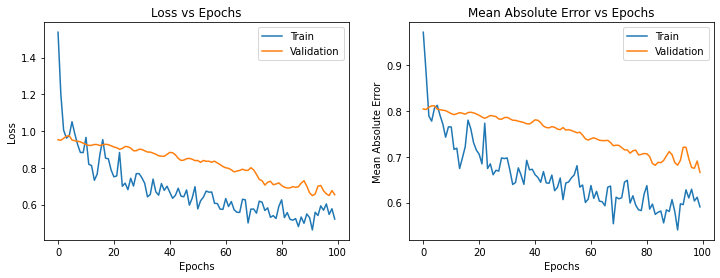

In [12]:
# Plot the learning curves

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

frame = pd.DataFrame(history.history)
epochs = np.arange(len(frame))

fig = plt.figure(figsize=(12,4))

# Loss plot
ax = fig.add_subplot(121)
ax.plot(epochs, frame['loss'], label="Train")
ax.plot(epochs, frame['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
ax.legend()

# Accuracy plot
ax = fig.add_subplot(122)
ax.plot(epochs, frame['mae'], label="Train")
ax.plot(epochs, frame['val_mae'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Mean Absolute Error")
ax.set_title("Mean Absolute Error vs Epochs")
ax.legend()